In [1]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=covid+19&output=json&rows=50000"

In [2]:
response = requests.get(url).json()

In [3]:
response

{'responseHeader': {'status': 0,
  'QTime': 554,
  'params': {'query': '( (title:covid^100 OR salients:covid^50 OR subject:covid^25 OR description:covid^15 OR collection:covid^10 OR language:covid^10 OR text:covid^1) (title:19^100 OR salients:19^50 OR subject:19^25 OR description:19^15 OR collection:19^10 OR language:19^10 OR text:19^1) )',
   'qin': 'covid 19',
   'fields': '_default_',
   'wt': 'json',
   'rows': '50000',
   'start': 0}},
 'response': {'numFound': 540611,
  'start': 0,
  'docs': [{'collection': ['pankajoudhia_texts', 'additional_collections'],
    'creator': 'Pankaj Oudhia',
    'date': '2021-08-09T00:00:00Z',
    'description': 'T his book is a part of series titled Pankaj Oudhia on cancer drug interactions 1 to 50,000. \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 For related queries write at pankajoudhia@gmail.com Where there are three references like these Oudhia, P. (1990-2021). Indigenous Medicinal Rice Laha Gondi 

In [4]:
response['response']['docs'][1]['date']

'2021-07-22T00:00:00Z'

In [5]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [6]:
dates

['2021-08-09T04:20:14Z',
 '2021-07-22T04:38:52Z',
 '2020-12-18T13:43:28Z',
 '2020-04-12T07:13:54Z',
 '2020-04-04T21:51:06Z',
 '2020-12-20T12:21:33Z',
 '2021-08-02T04:24:32Z',
 '2020-05-27T06:16:13Z',
 '2020-09-18T21:56:59Z',
 '2021-03-11T19:09:52Z',
 '2021-04-12T21:08:33Z',
 '2021-04-03T18:09:27Z',
 '2020-09-02T04:02:21Z',
 '2021-03-12T17:41:41Z',
 '2021-04-05T20:18:01Z',
 '2021-04-05T20:18:17Z',
 '2021-03-19T11:10:28Z',
 '2021-03-19T13:01:47Z',
 '2020-10-18T00:42:26Z',
 '2021-04-10T22:41:46Z',
 '2021-04-14T06:25:11Z',
 '2021-05-07T02:52:40Z',
 '2021-01-02T13:12:39Z',
 '2021-01-20T21:38:44Z',
 '2021-03-12T21:12:45Z',
 '2021-01-18T21:40:39Z',
 '2021-04-12T12:05:39Z',
 '2021-01-19T14:16:41Z',
 '2021-01-07T13:12:10Z',
 '2021-01-11T22:16:11Z',
 '2020-04-14T08:27:23Z',
 '2021-01-25T03:03:11Z',
 '2021-04-08T18:06:08Z',
 '2020-04-10T14:25:04Z',
 '2021-04-08T14:50:24Z',
 '2020-12-17T18:05:16Z',
 '2020-05-04T05:00:00Z',
 '2020-05-10T22:21:04Z',
 '2020-12-09T16:00:19Z',
 '2020-12-24T18:22:56Z',


In [7]:
dates = [x for x in dates if x]

In [8]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [9]:
dates

['2021-08-09T04:20:14Z',
 '2021-07-22T04:38:52Z',
 '2020-12-18T13:43:28Z',
 '2020-04-12T07:13:54Z',
 '2020-04-04T21:51:06Z',
 '2020-12-20T12:21:33Z',
 '2021-08-02T04:24:32Z',
 '2020-05-27T06:16:13Z',
 '2020-09-18T21:56:59Z',
 '2021-03-11T19:09:52Z',
 '2021-04-12T21:08:33Z',
 '2021-04-03T18:09:27Z',
 '2020-09-02T04:02:21Z',
 '2021-03-12T17:41:41Z',
 '2021-04-05T20:18:01Z',
 '2021-04-05T20:18:17Z',
 '2021-03-19T11:10:28Z',
 '2021-03-19T13:01:47Z',
 '2020-10-18T00:42:26Z',
 '2021-04-10T22:41:46Z',
 '2021-04-14T06:25:11Z',
 '2021-05-07T02:52:40Z',
 '2021-01-02T13:12:39Z',
 '2021-01-20T21:38:44Z',
 '2021-03-12T21:12:45Z',
 '2021-01-18T21:40:39Z',
 '2021-04-12T12:05:39Z',
 '2021-01-19T14:16:41Z',
 '2021-01-07T13:12:10Z',
 '2021-01-11T22:16:11Z',
 '2020-04-14T08:27:23Z',
 '2021-01-25T03:03:11Z',
 '2021-04-08T18:06:08Z',
 '2020-04-10T14:25:04Z',
 '2021-04-08T14:50:24Z',
 '2020-12-17T18:05:16Z',
 '2020-05-04T05:00:00Z',
 '2020-05-10T22:21:04Z',
 '2020-12-09T16:00:19Z',
 '2020-12-24T18:22:56Z',


In [10]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2019':
            del dates[i]
            newdates=len(dates)

In [11]:
len(dates)

9997

In [12]:
min(dates)

'2019-09-26T05:46:20Z'

In [13]:
max(dates)

'2021-09-15T14:36:51Z'

In [14]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [15]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [16]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [17]:
df1.set_index('DATE', inplace=True)

In [18]:
df1

,Count
DATE,
2019-09-26,1
2020-02-15,1
2020-02-16,1
2020-02-26,1
2020-03-06,2
...,...
2021-09-11,2
2021-09-12,2
2021-09-13,9


In [37]:
df1.drop(df1.index[0],inplace=True)

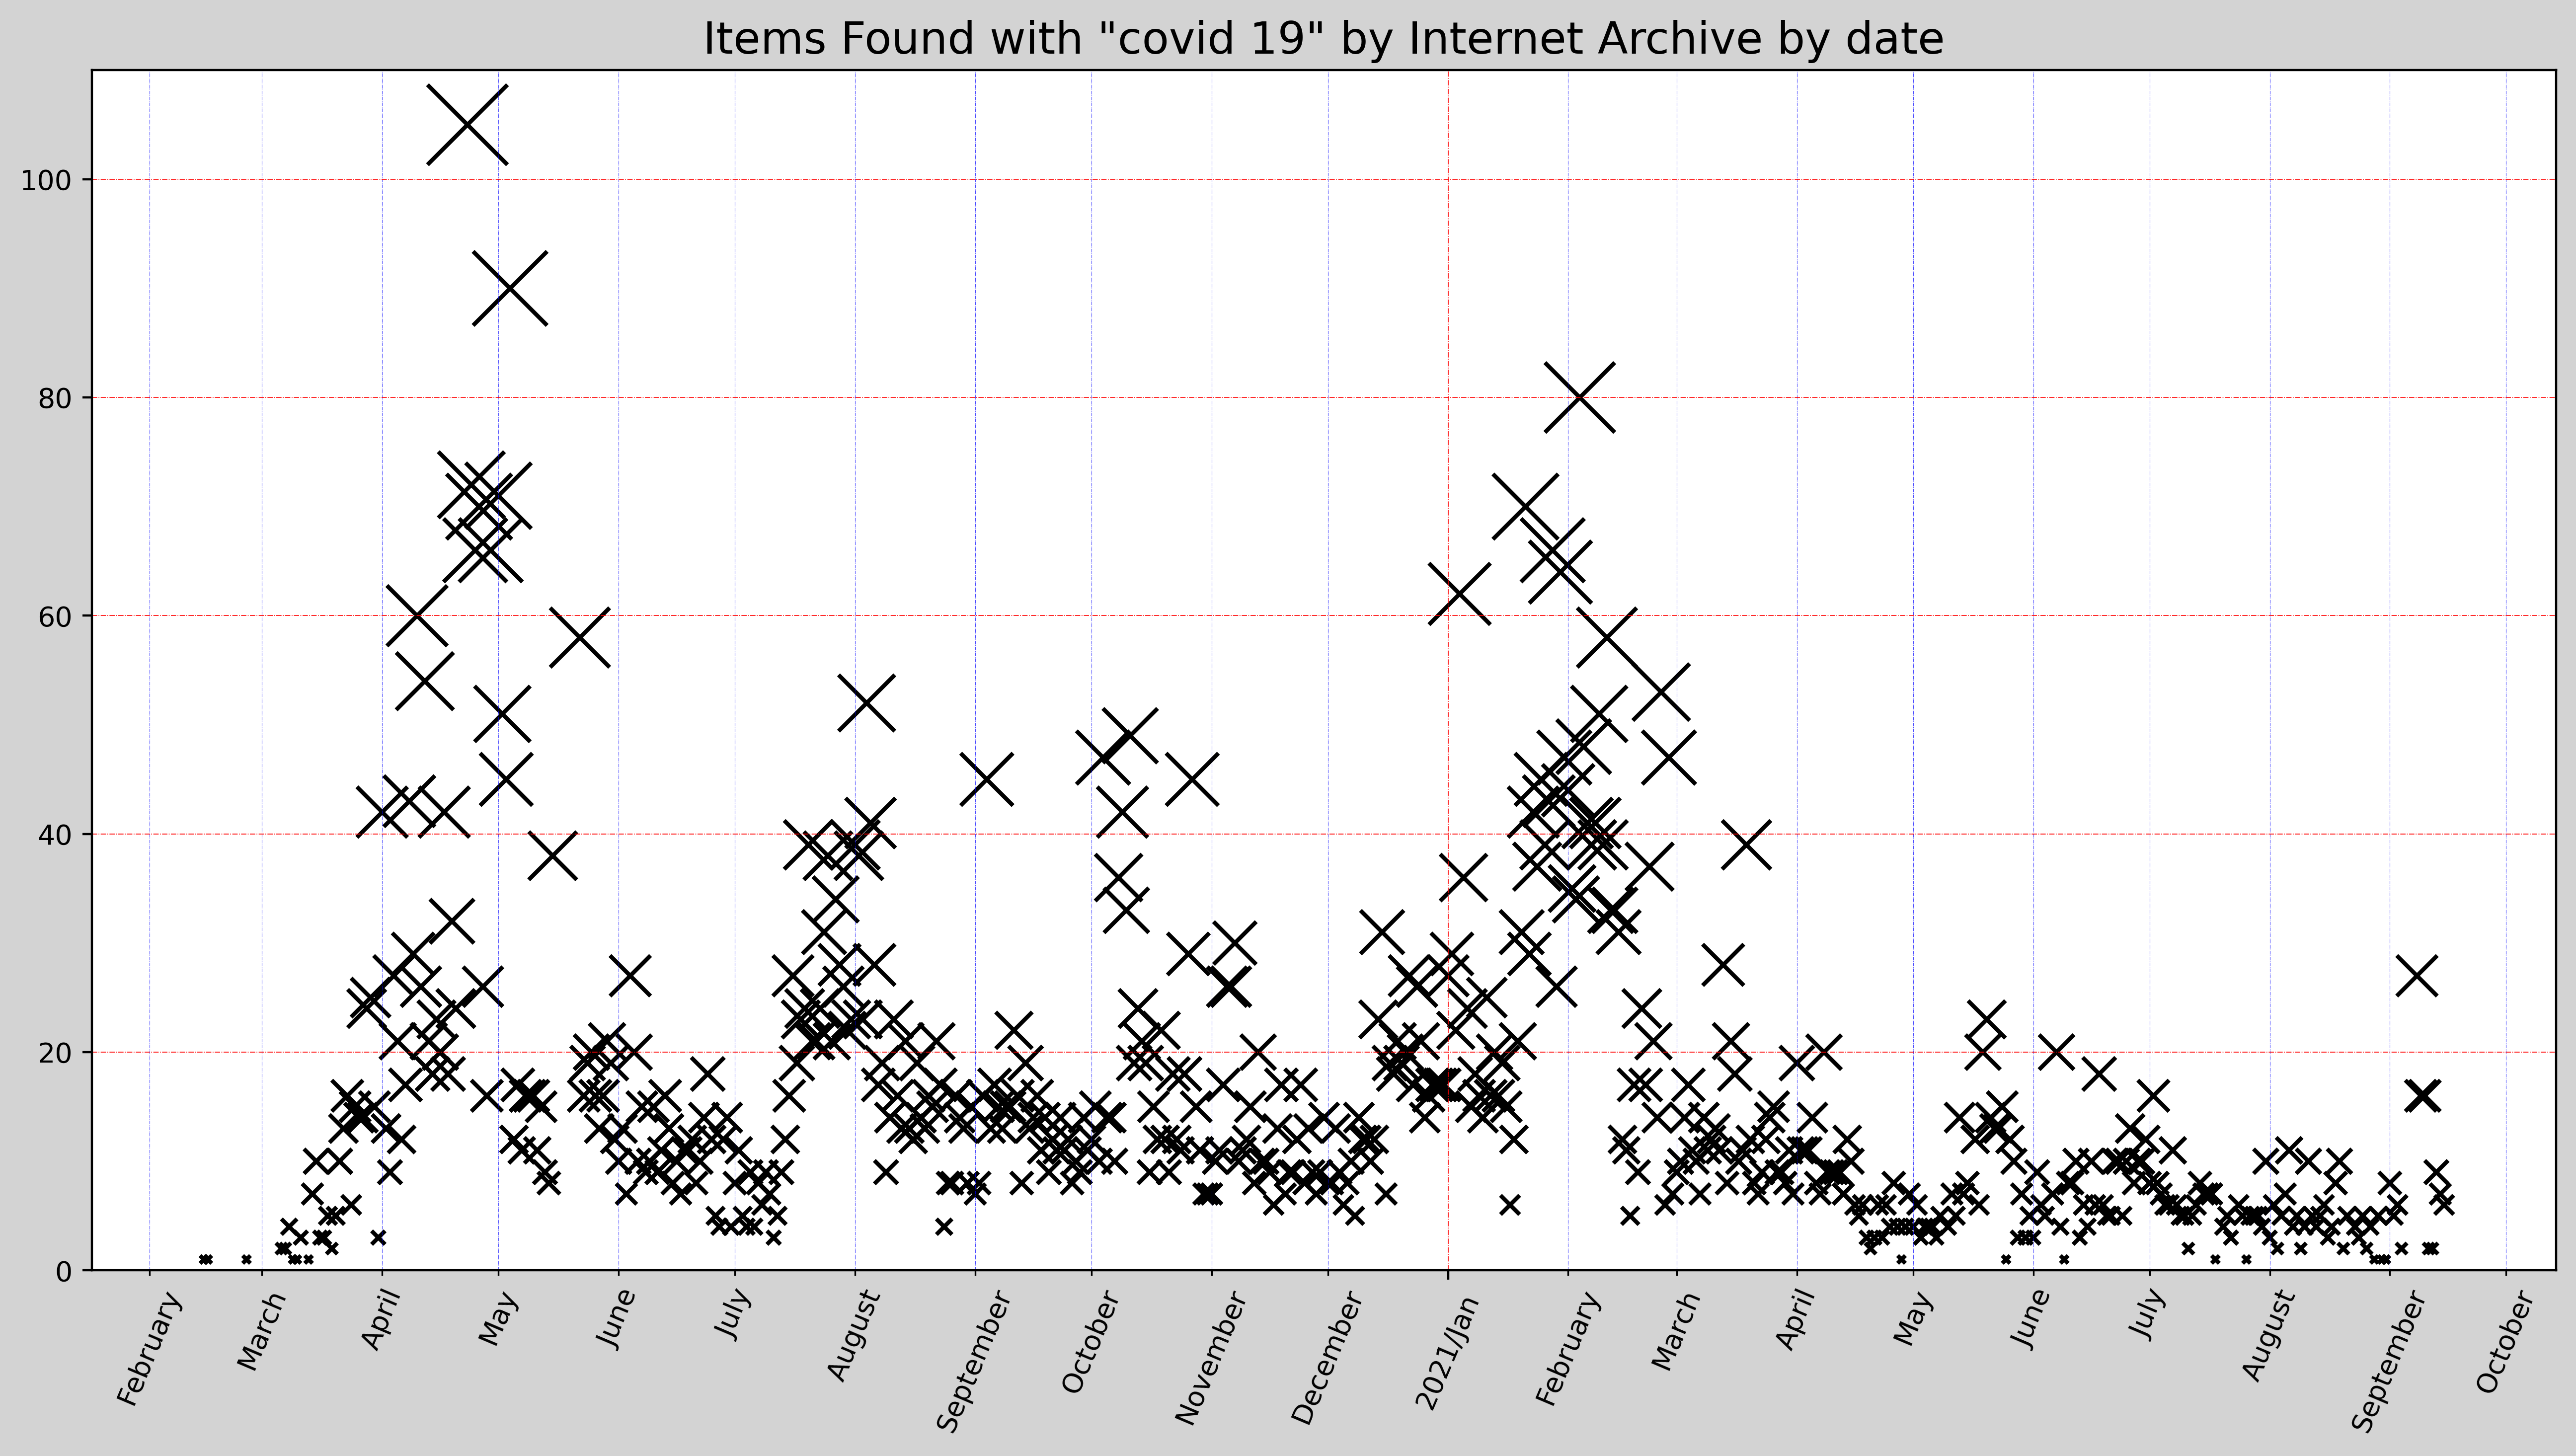

In [38]:
%matplotlib inline
x = df1.index
y = df1['Count']

fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*8,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=110,bottom=0)
plt.title('Items Found with "covid 19" by Internet Archive by date',size=16)

plt.show()
plt.close()

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()